# Generate figures for chapter

This file generates and saves the figures and tables in "Measuring Partisan Fairness" for _Political Geometry_. 

In [18]:
%run utilities
%run noninteractive_utilities  # Includes all the functions defined in the interactive notebooks

dpi = 300
mpl.rcParams['figure.dpi']= dpi

want_statewide_vote_share = True  # Set to True if you want Statewide Republican vote share, False if you want average district Republican vote share

if want_statewide_vote_share:
    x_label = "Statewide Republican vote share"
else:
    x_label = "Average district Republican vote share"

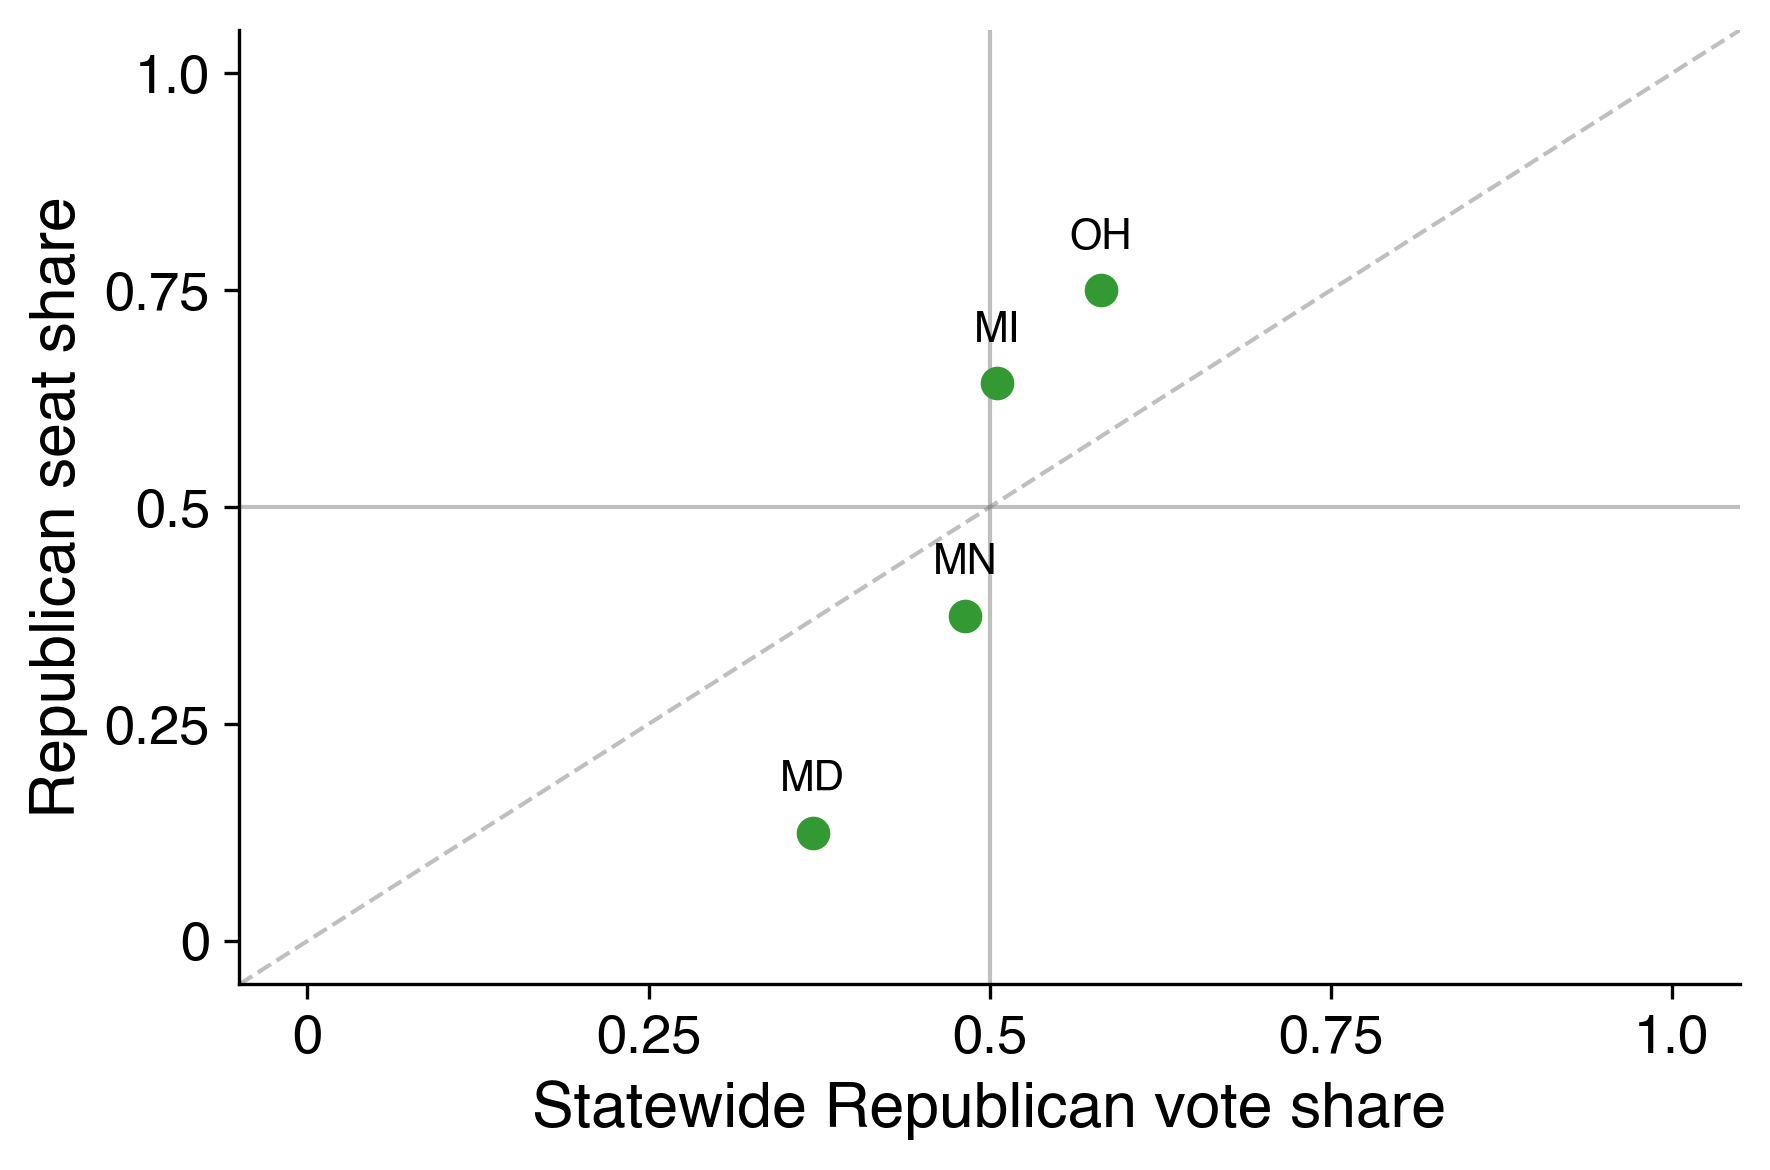

In [19]:
# Plot four elections on the seats-votes plane using MIT Elections Lab data

states = ["MD", "MN", "OH", "MI"]
year = 2016
average_district_vote_share_list = []
statewide_vote_share_list = []
seat_share_list = []
point_label_list = []

for state in states:
    republican_votes_by_district, democrat_votes_by_district = get_two_party_votes(state, year) 
    republican_vote_share_by_district, democrat_vote_share_by_district = votes_to_shares_by_district(republican_votes_by_district, democrat_votes_by_district)
    average_district_vote_share, seat_share = district_vote_shares_to_vote_and_seat_shares(republican_vote_share_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(republican_votes_by_district, democrat_votes_by_district)

    average_district_vote_share_list.append(average_district_vote_share)
    statewide_vote_share_list.append(republican_statewide_vote_share)
    seat_share_list.append(seat_share)
    point_label_list.append(state)



if want_statewide_vote_share:
    plot_list_of_vote_and_seat_shares(statewide_vote_share_list, 
                                      seat_share_list, 
                                      regression=False, 
                                      text='', 
                                      point_labels=point_label_list,
                                      x_label=x_label)
else:
    plot_list_of_vote_and_seat_shares(average_district_vote_share_list, seat_share_list, regression=False, text='', point_labels=point_label_list)


plt.tight_layout()
plt.savefig("outputs/base_elections.png", dpi=500)


Slope of regression line: 2.821902213304027
Intercept of regression line: -0.8438420207118194


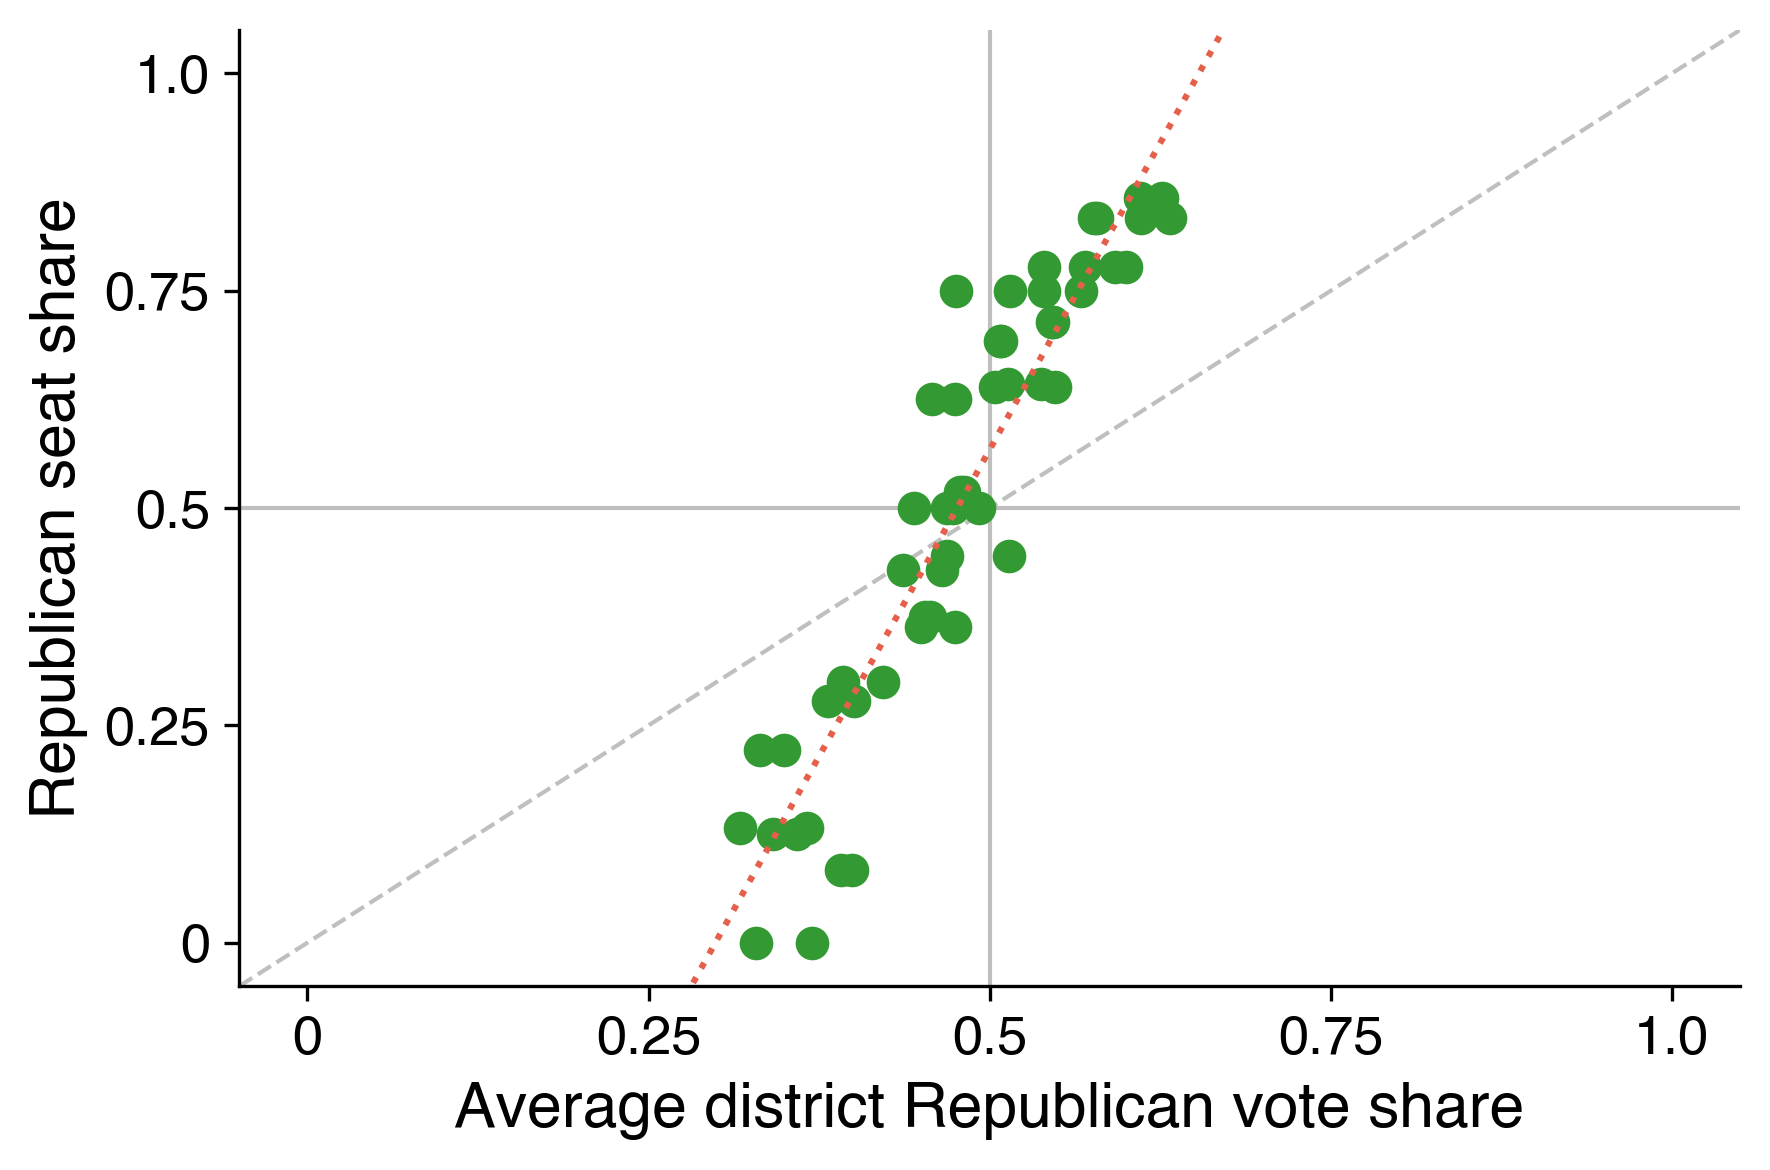

In [20]:
# Plot data from the Daily Kos breakdown of Presidential vote share by Congressional District

votes, seats = read_daily_kos_data()
plot_list_of_vote_and_seat_shares(votes, seats)
plt.tight_layout()
plt.savefig("outputs/daily_kos.png", dpi=500)


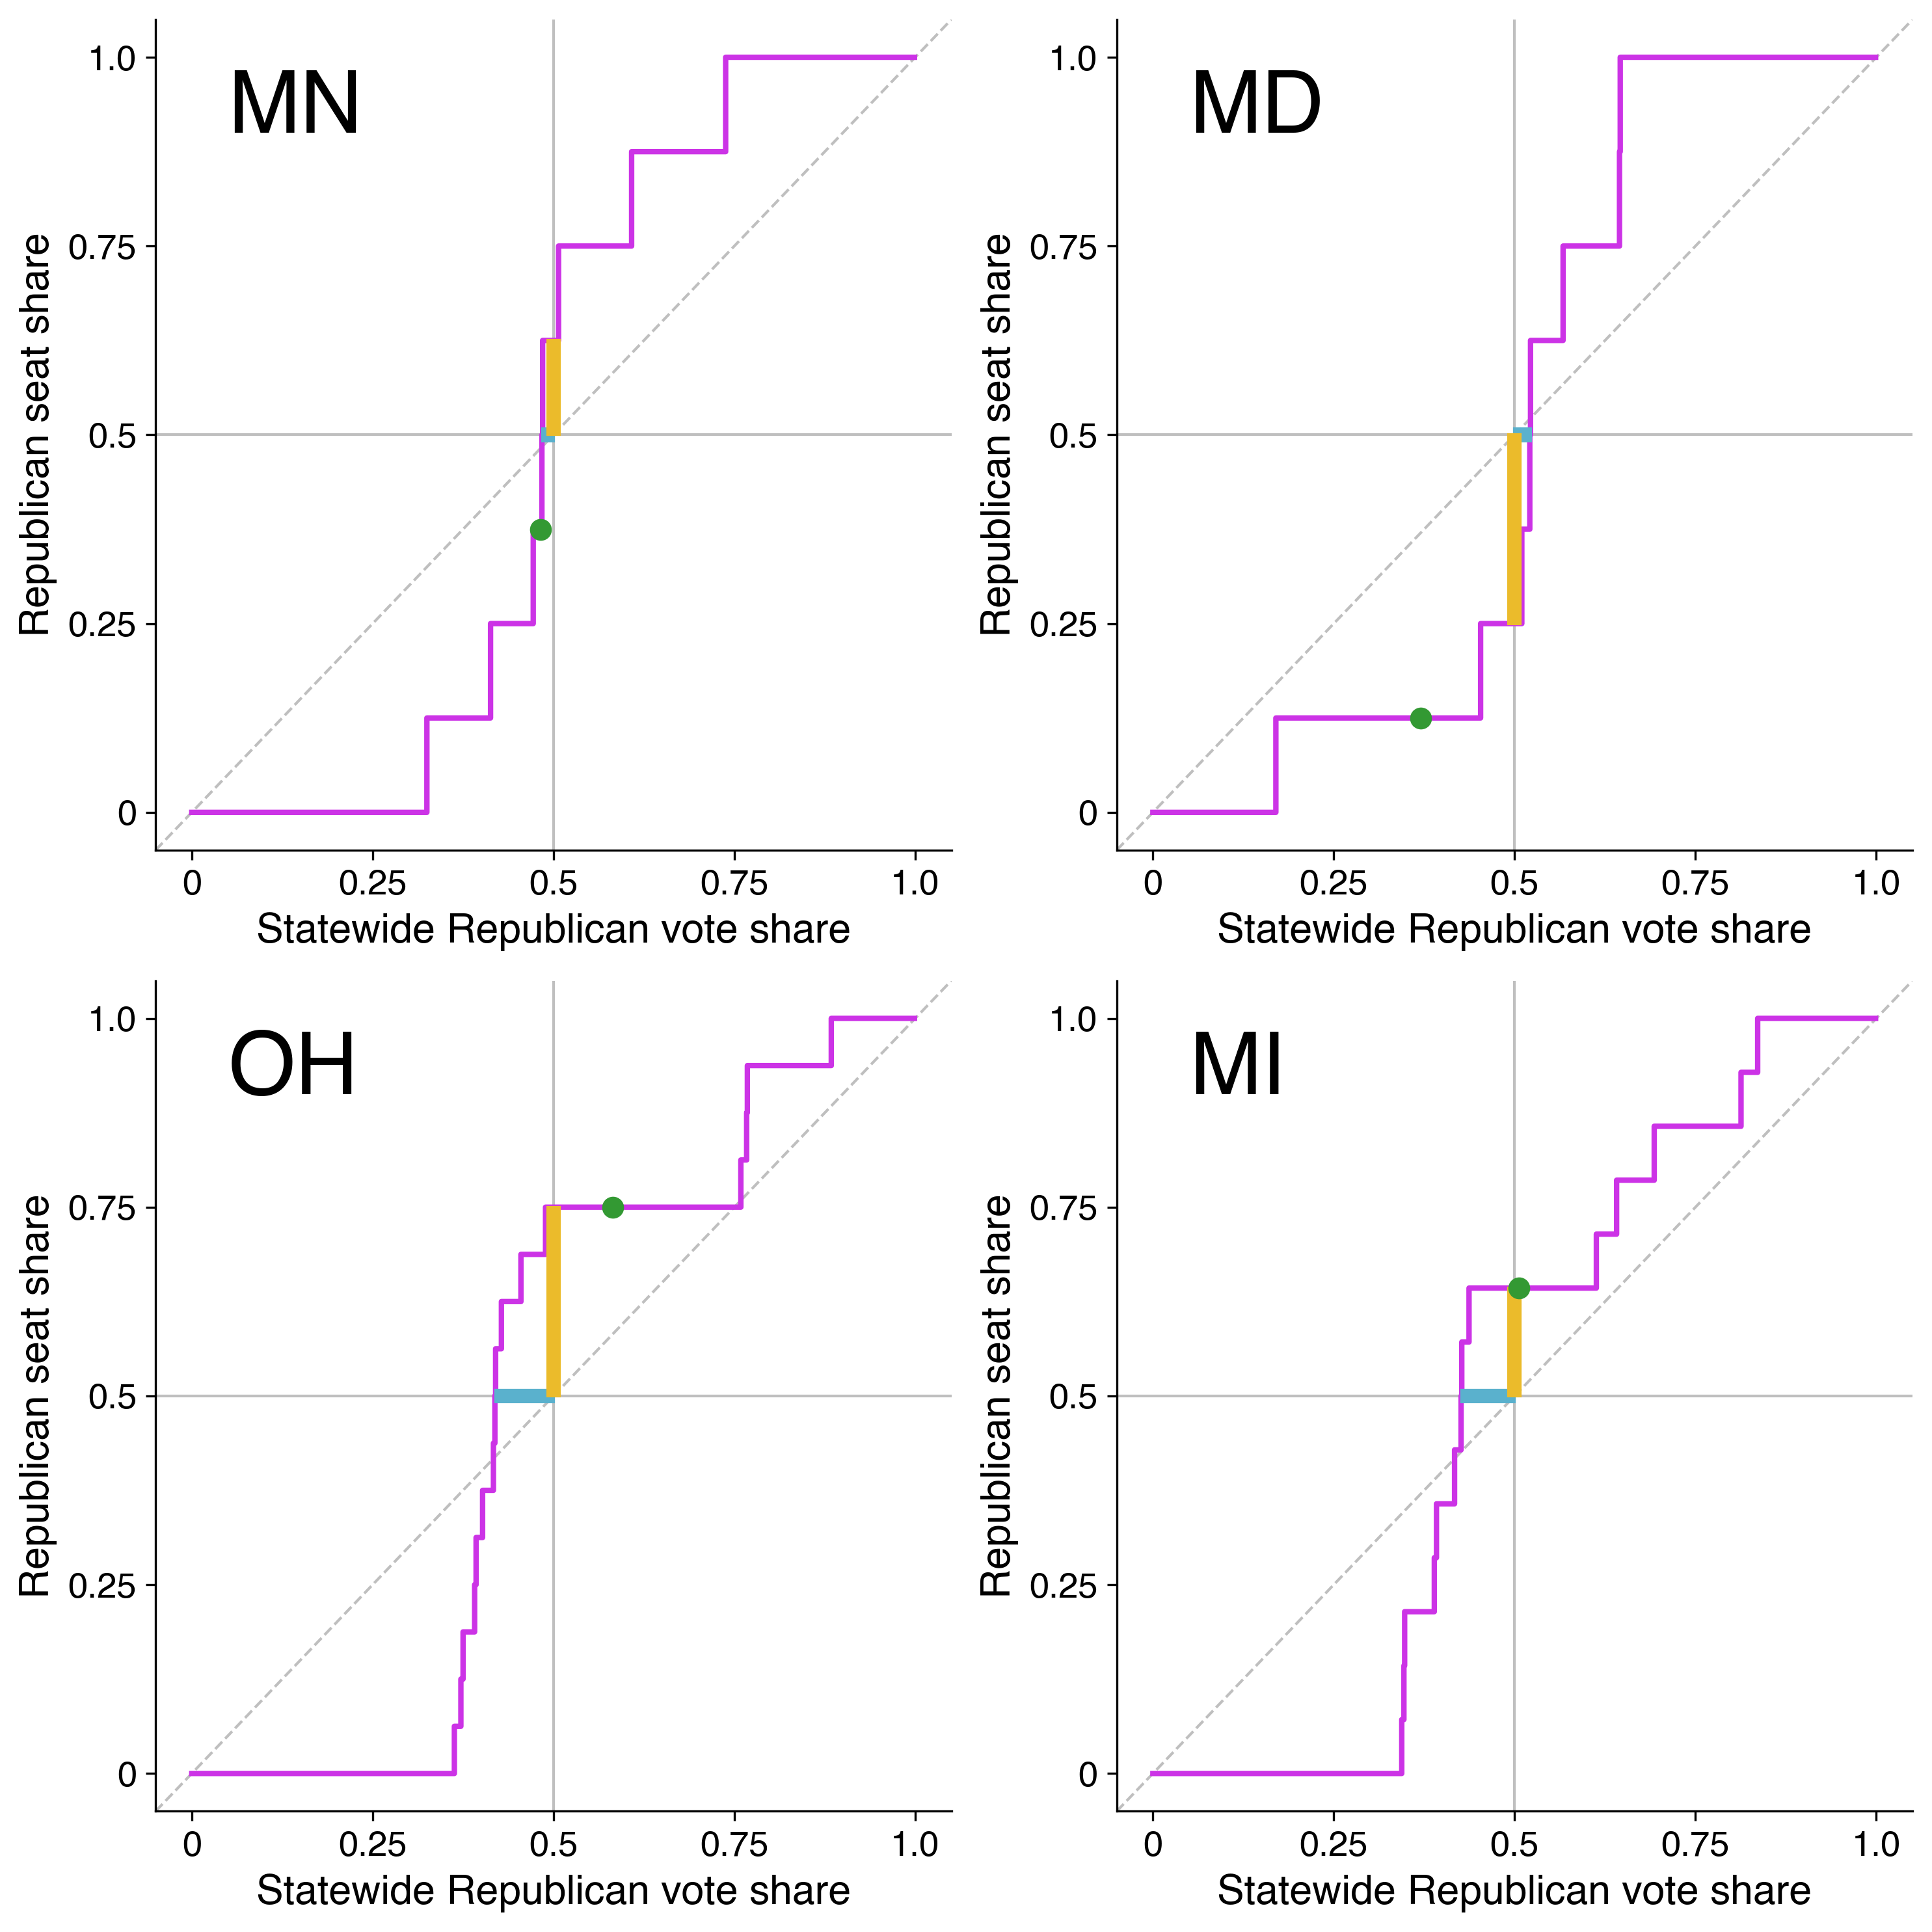

In [21]:
# Plot measures of partisan symmetry relating to the (0.5, 0.5) point

states = ["MN", "MD", "OH", "MI"]
year = 2016
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []
district_vote_shares = []


for state in states:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    average_district_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(rep_votes_by_district, dem_votes_by_district)   
    district_vote_shares.append(rep_vote_shares_by_district)
    
    if want_statewide_vote_share:
        actual_vote_share_list.append(republican_statewide_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear_using_statewide_vote_share(rep_votes_by_district, dem_votes_by_district)
    else:
        actual_vote_share_list.append(average_district_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)

    vote_list.append(ups_votes) 
    seat_list.append(ups_seats)


plot_mean_median_and_partisan_bias_grid(states,
                                        actual_vote_share_list, 
                                        actual_seat_share_list, 
                                        vote_list, 
                                        seat_list,
                                        x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/mean_median_partisan_bias.png", dpi=500)


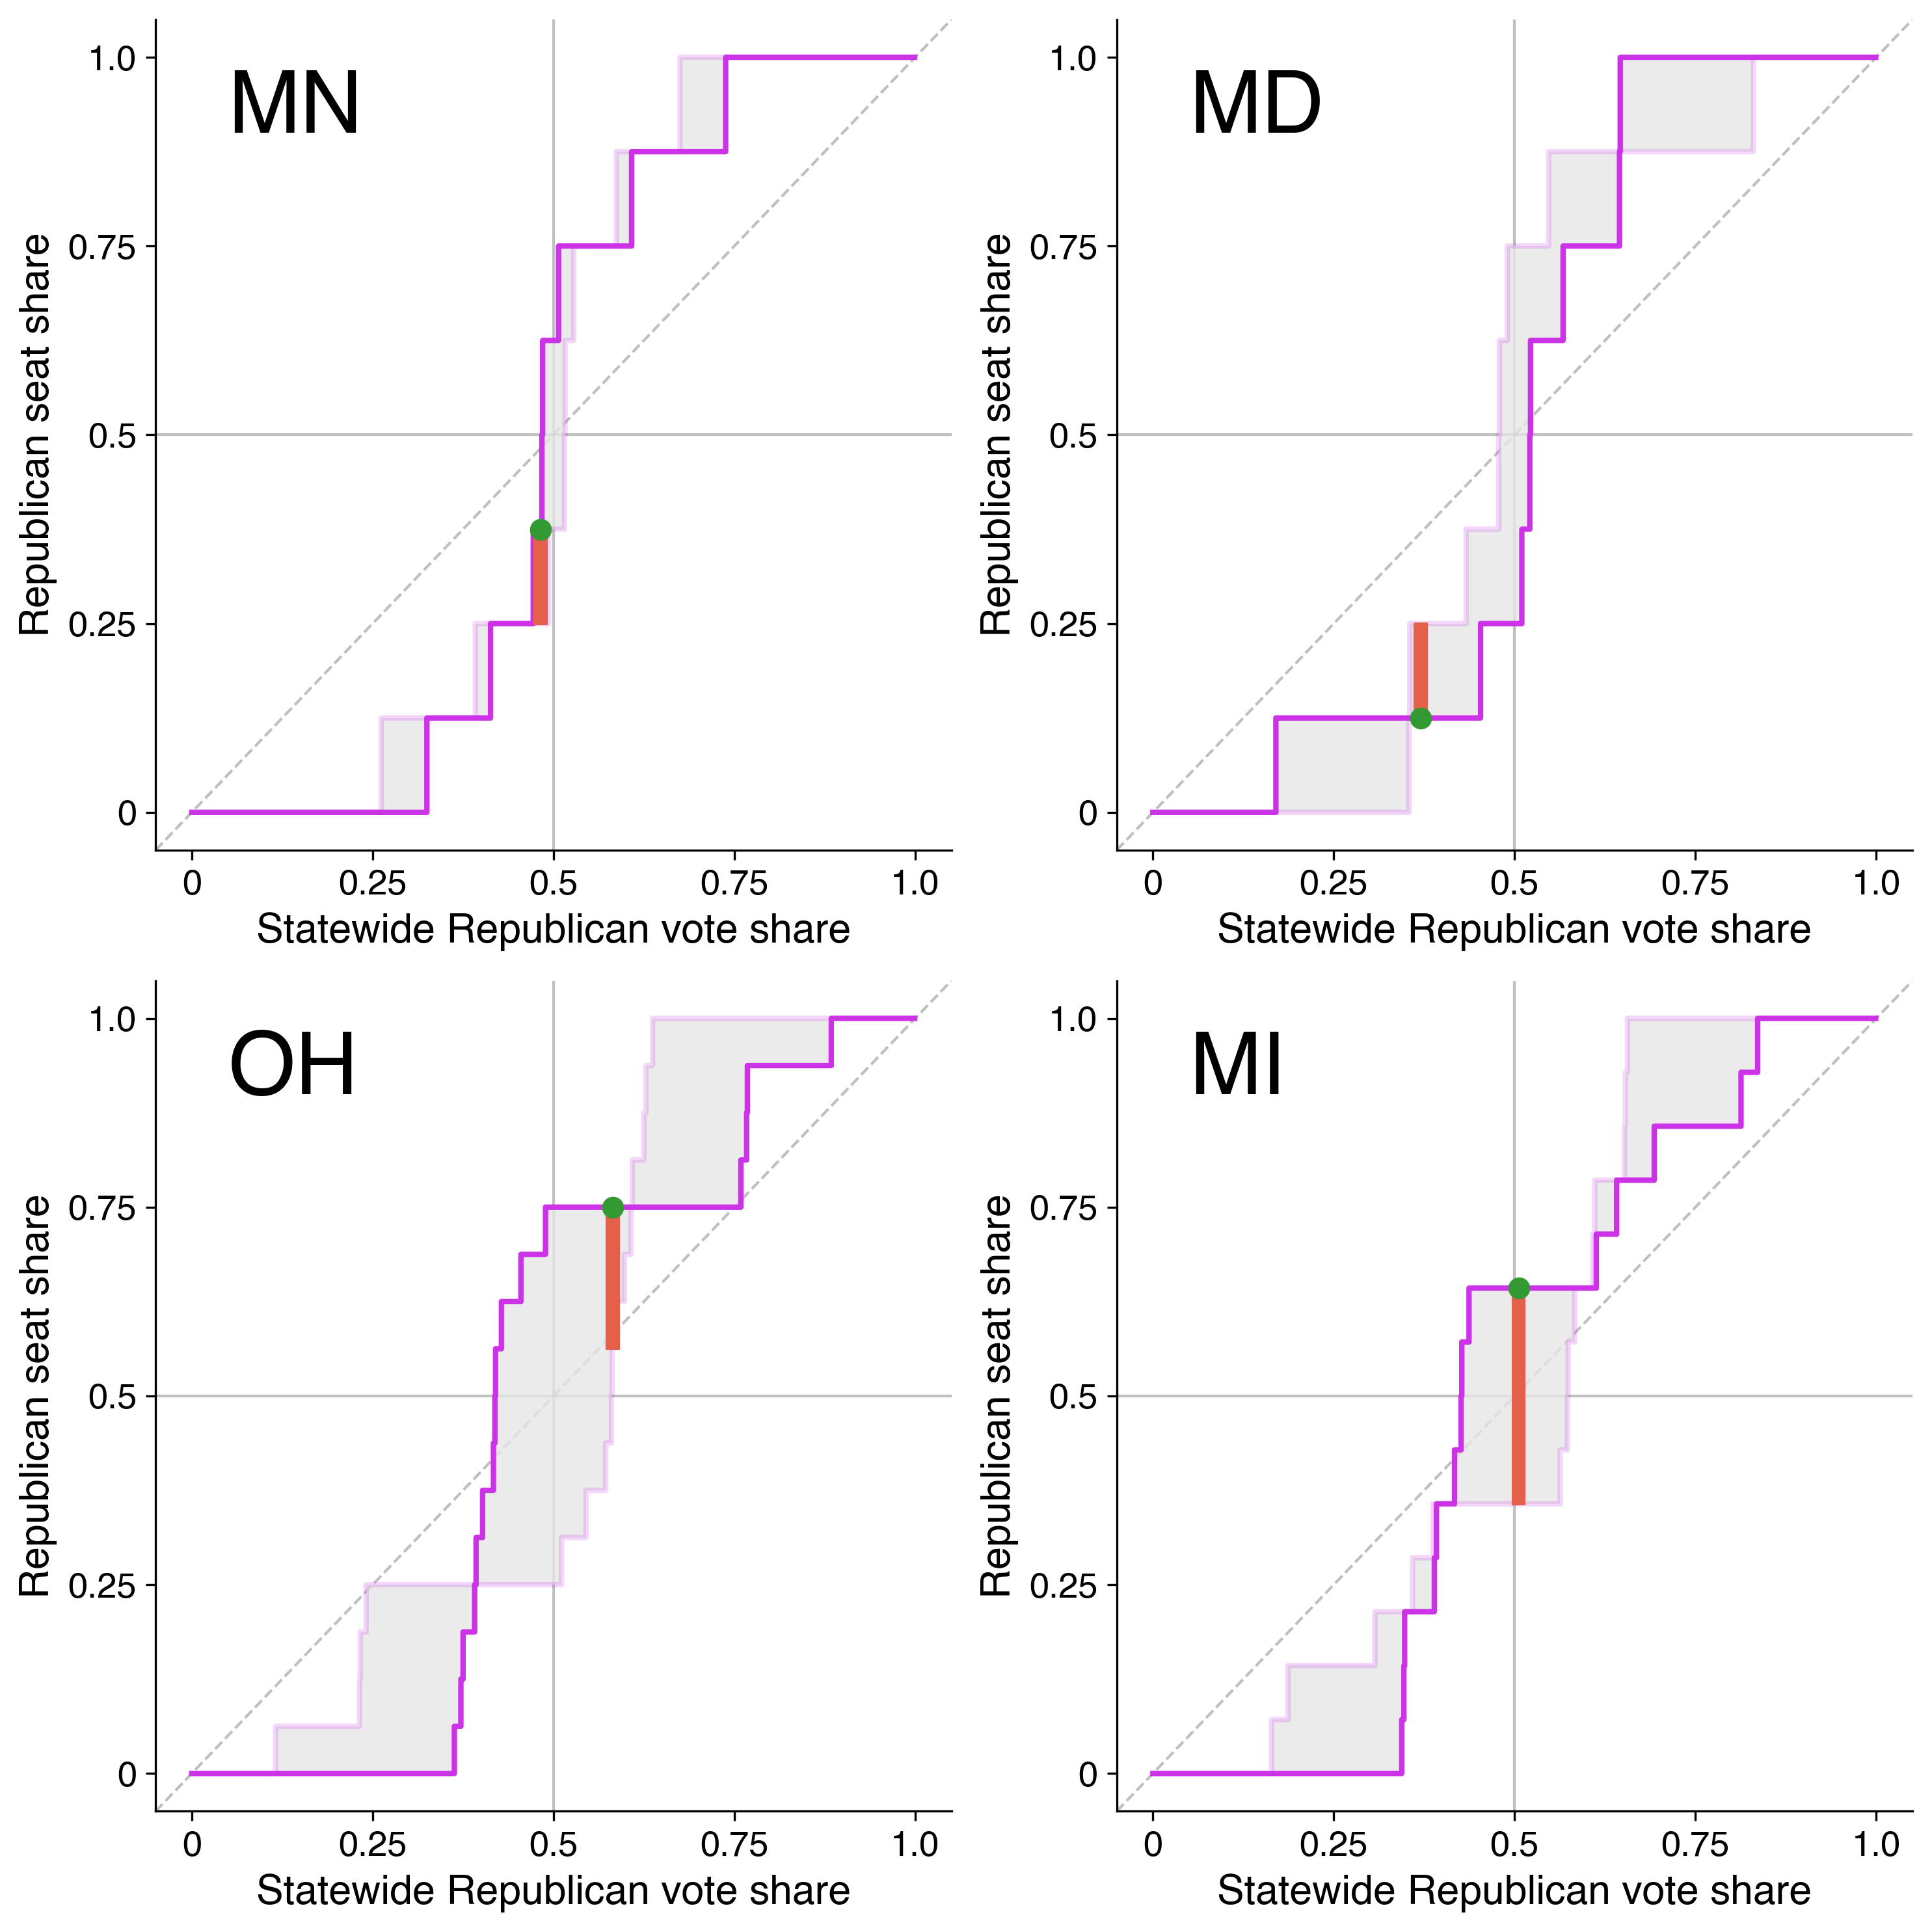

In [22]:
# Plot measures of partisan symmetry relating to the 180 degree rotation


plot_symmetric_point_and_shading_grid(states,
                                      actual_vote_share_list, 
                                      actual_seat_share_list, 
                                      vote_list, 
                                      seat_list,
                                      x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/area_and_symmetry.png", dpi=500)


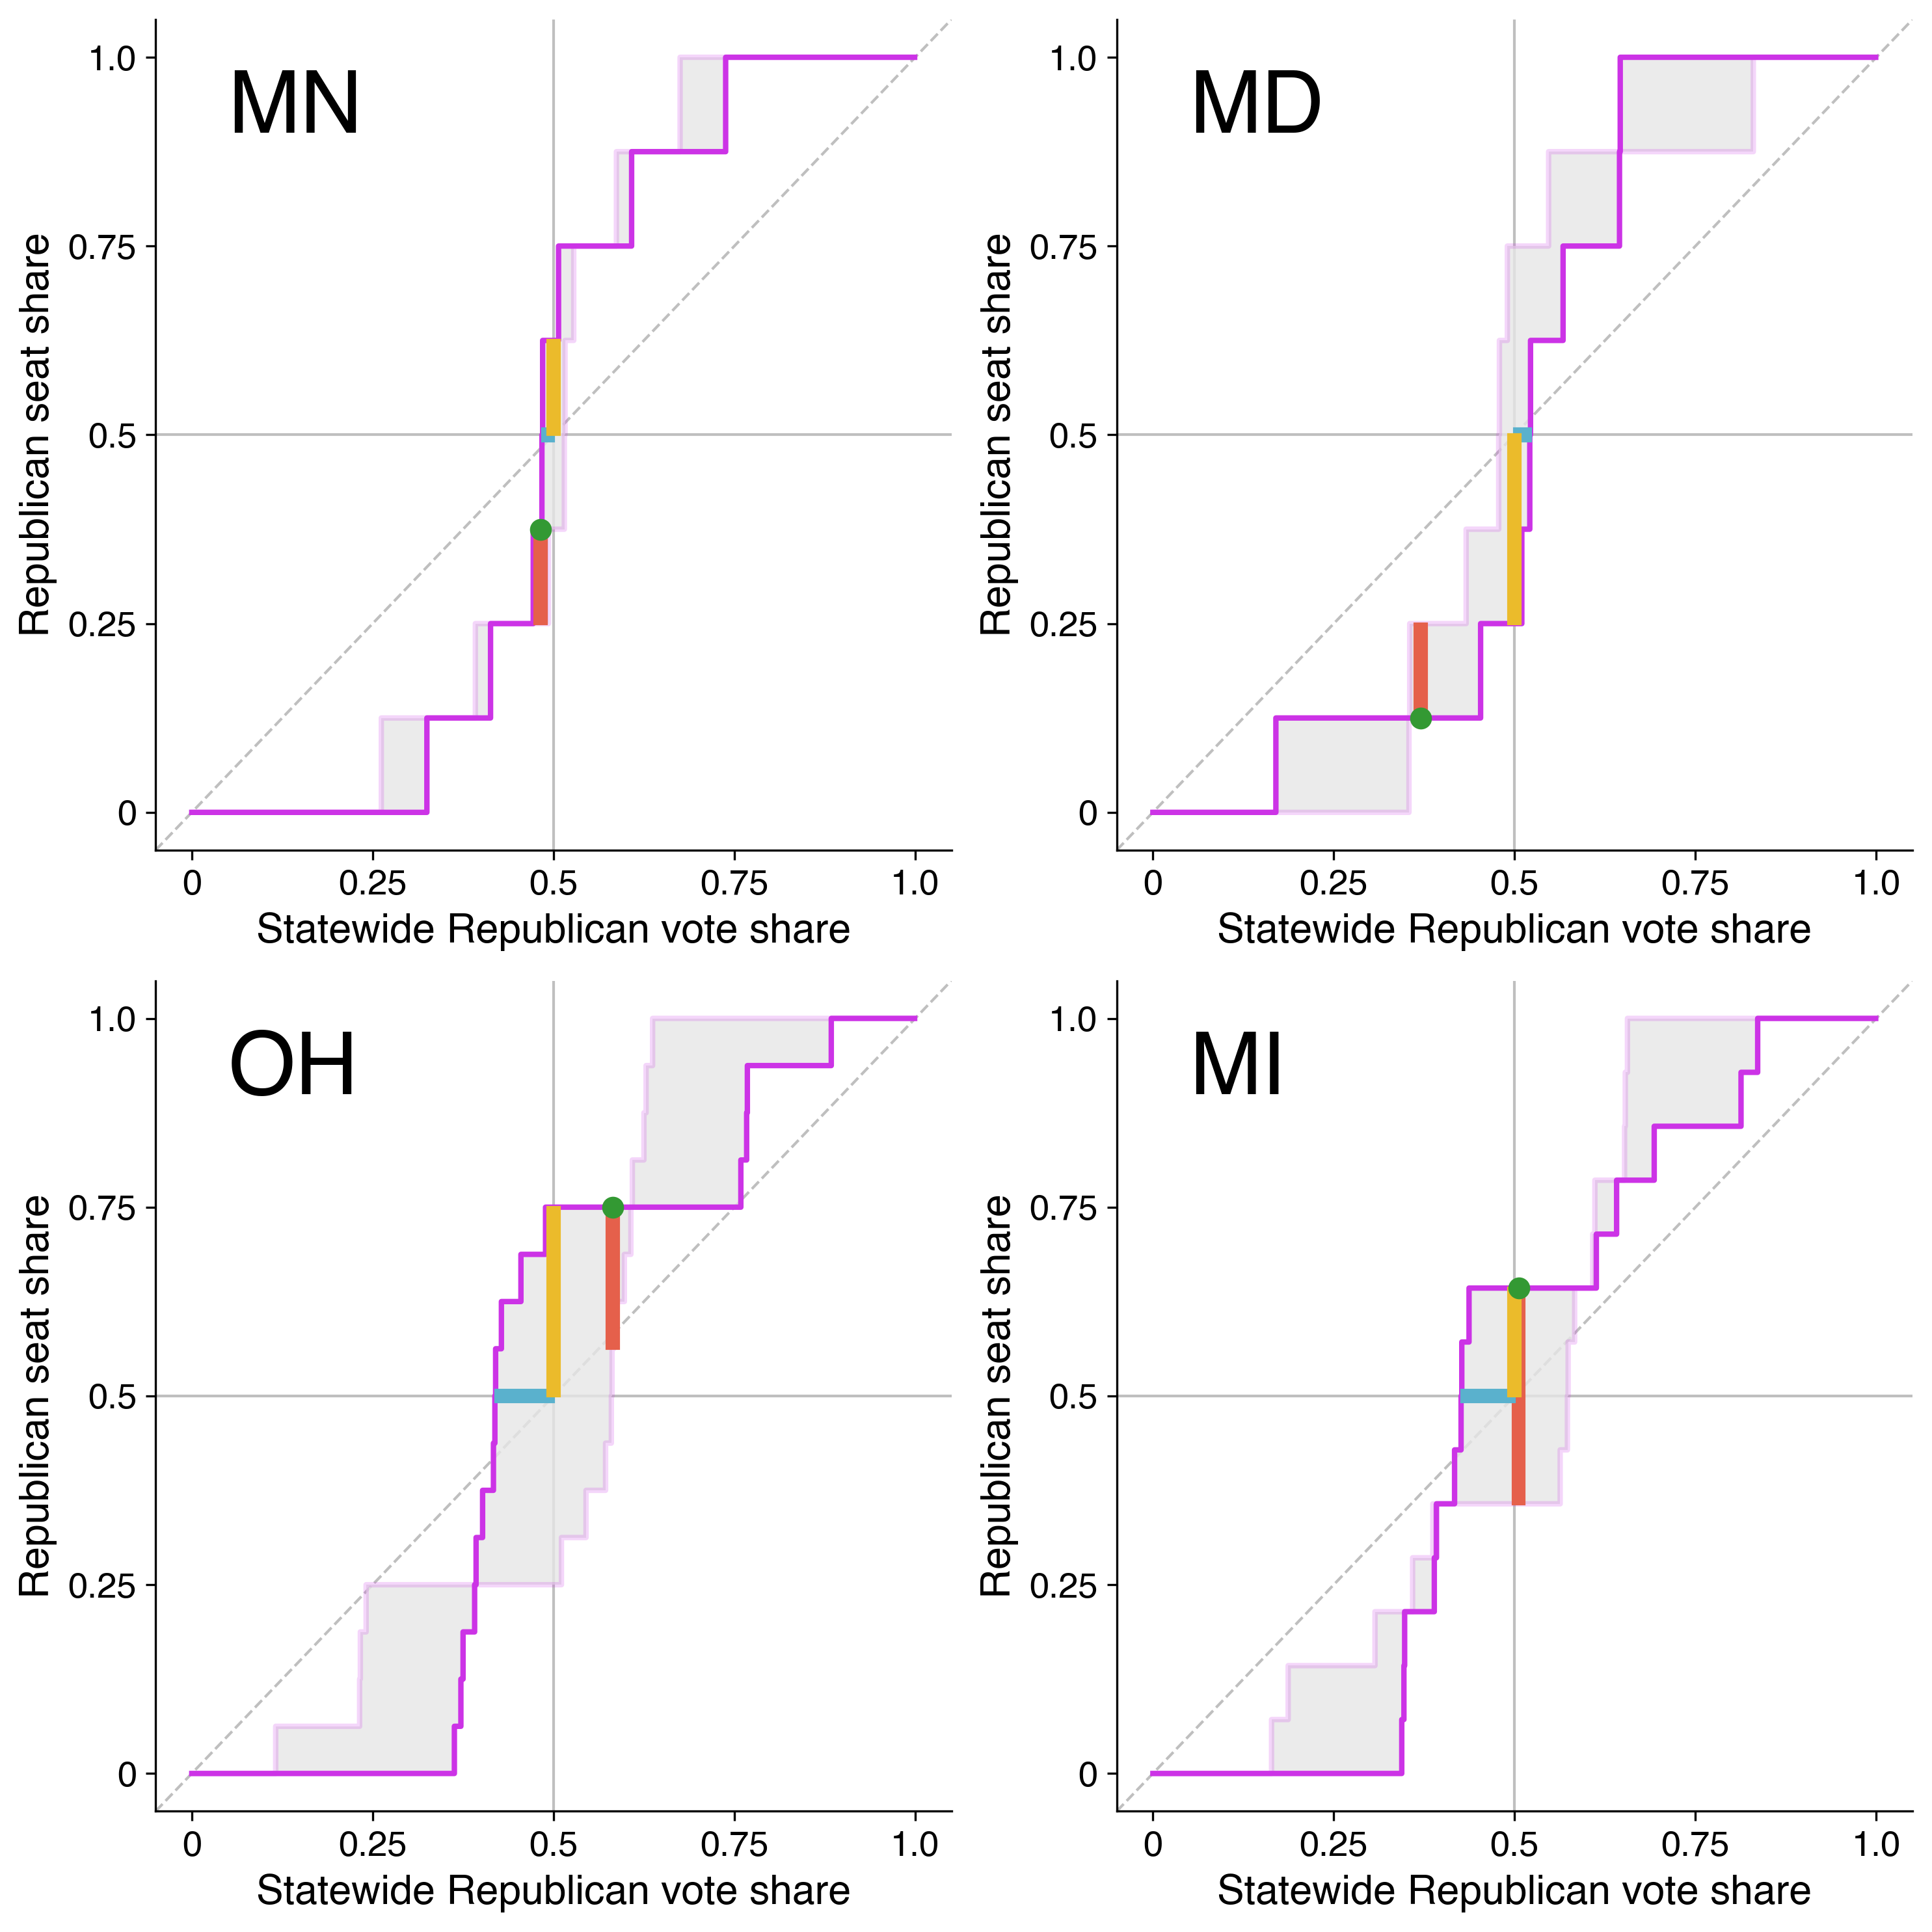

In [23]:
# Plot all the measures of partisan symmetry

plot_all_measures_grid(states, 
                       actual_vote_share_list, 
                       actual_seat_share_list, 
                       vote_list, 
                       seat_list, 
                       x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/all_measures.png", dpi=500)


In [24]:
make_partisan_symmetry_table(states, 
                             actual_vote_share_list, 
                             actual_seat_share_list, 
                             vote_list, 
                             seat_list,
                             district_vote_shares,
                             latex=True)


State & $\int_{0.4} ^ {0.6} \beta(V) dV$ & $\int_0 ^ 1 \bigl |\beta(V)\bigr | dV$ & $\beta(\VO)$ & $\beta(0.5)$ & Mean-median \\
&   &    &           &            & score \\ \hline
MN & 0.005 & 0.017 & 0.062 & 0.125 &  0.019 \\ 
MD & -0.022 & 0.05 & -0.062 & -0.25 &  -0.018 \\ 
OH & 0.036 & 0.078 & 0.094 & 0.25 &  0.087 \\ 
MI & 0.021 & 0.051 & 0.143 & 0.143 &  0.082 \\ 
\hline 
 \end{tabular}


State & $\int_{0.4} ^ {0.6} \beta(V) dV$ & $\int_0 ^ 1 \bigl |\beta(V)\bigr | dV$ & $\beta(\VO)$ & $\beta(0.5)$ & Mean-median \\
&   &    &           &            & score \\ \hline
2012 & 0.001 & 0.006 & 0.0 & 0.0 &  0.007 \\ 
2014 & 0.008 & 0.025 & -0.062 & 0.0 &  -0.002 \\ 
2016 & 0.005 & 0.017 & 0.062 & 0.125 &  0.019 \\ 
2018 & 0.014 & 0.028 & 0.062 & 0.125 &  0.03 \\ 
\hline 
 \end{tabular}


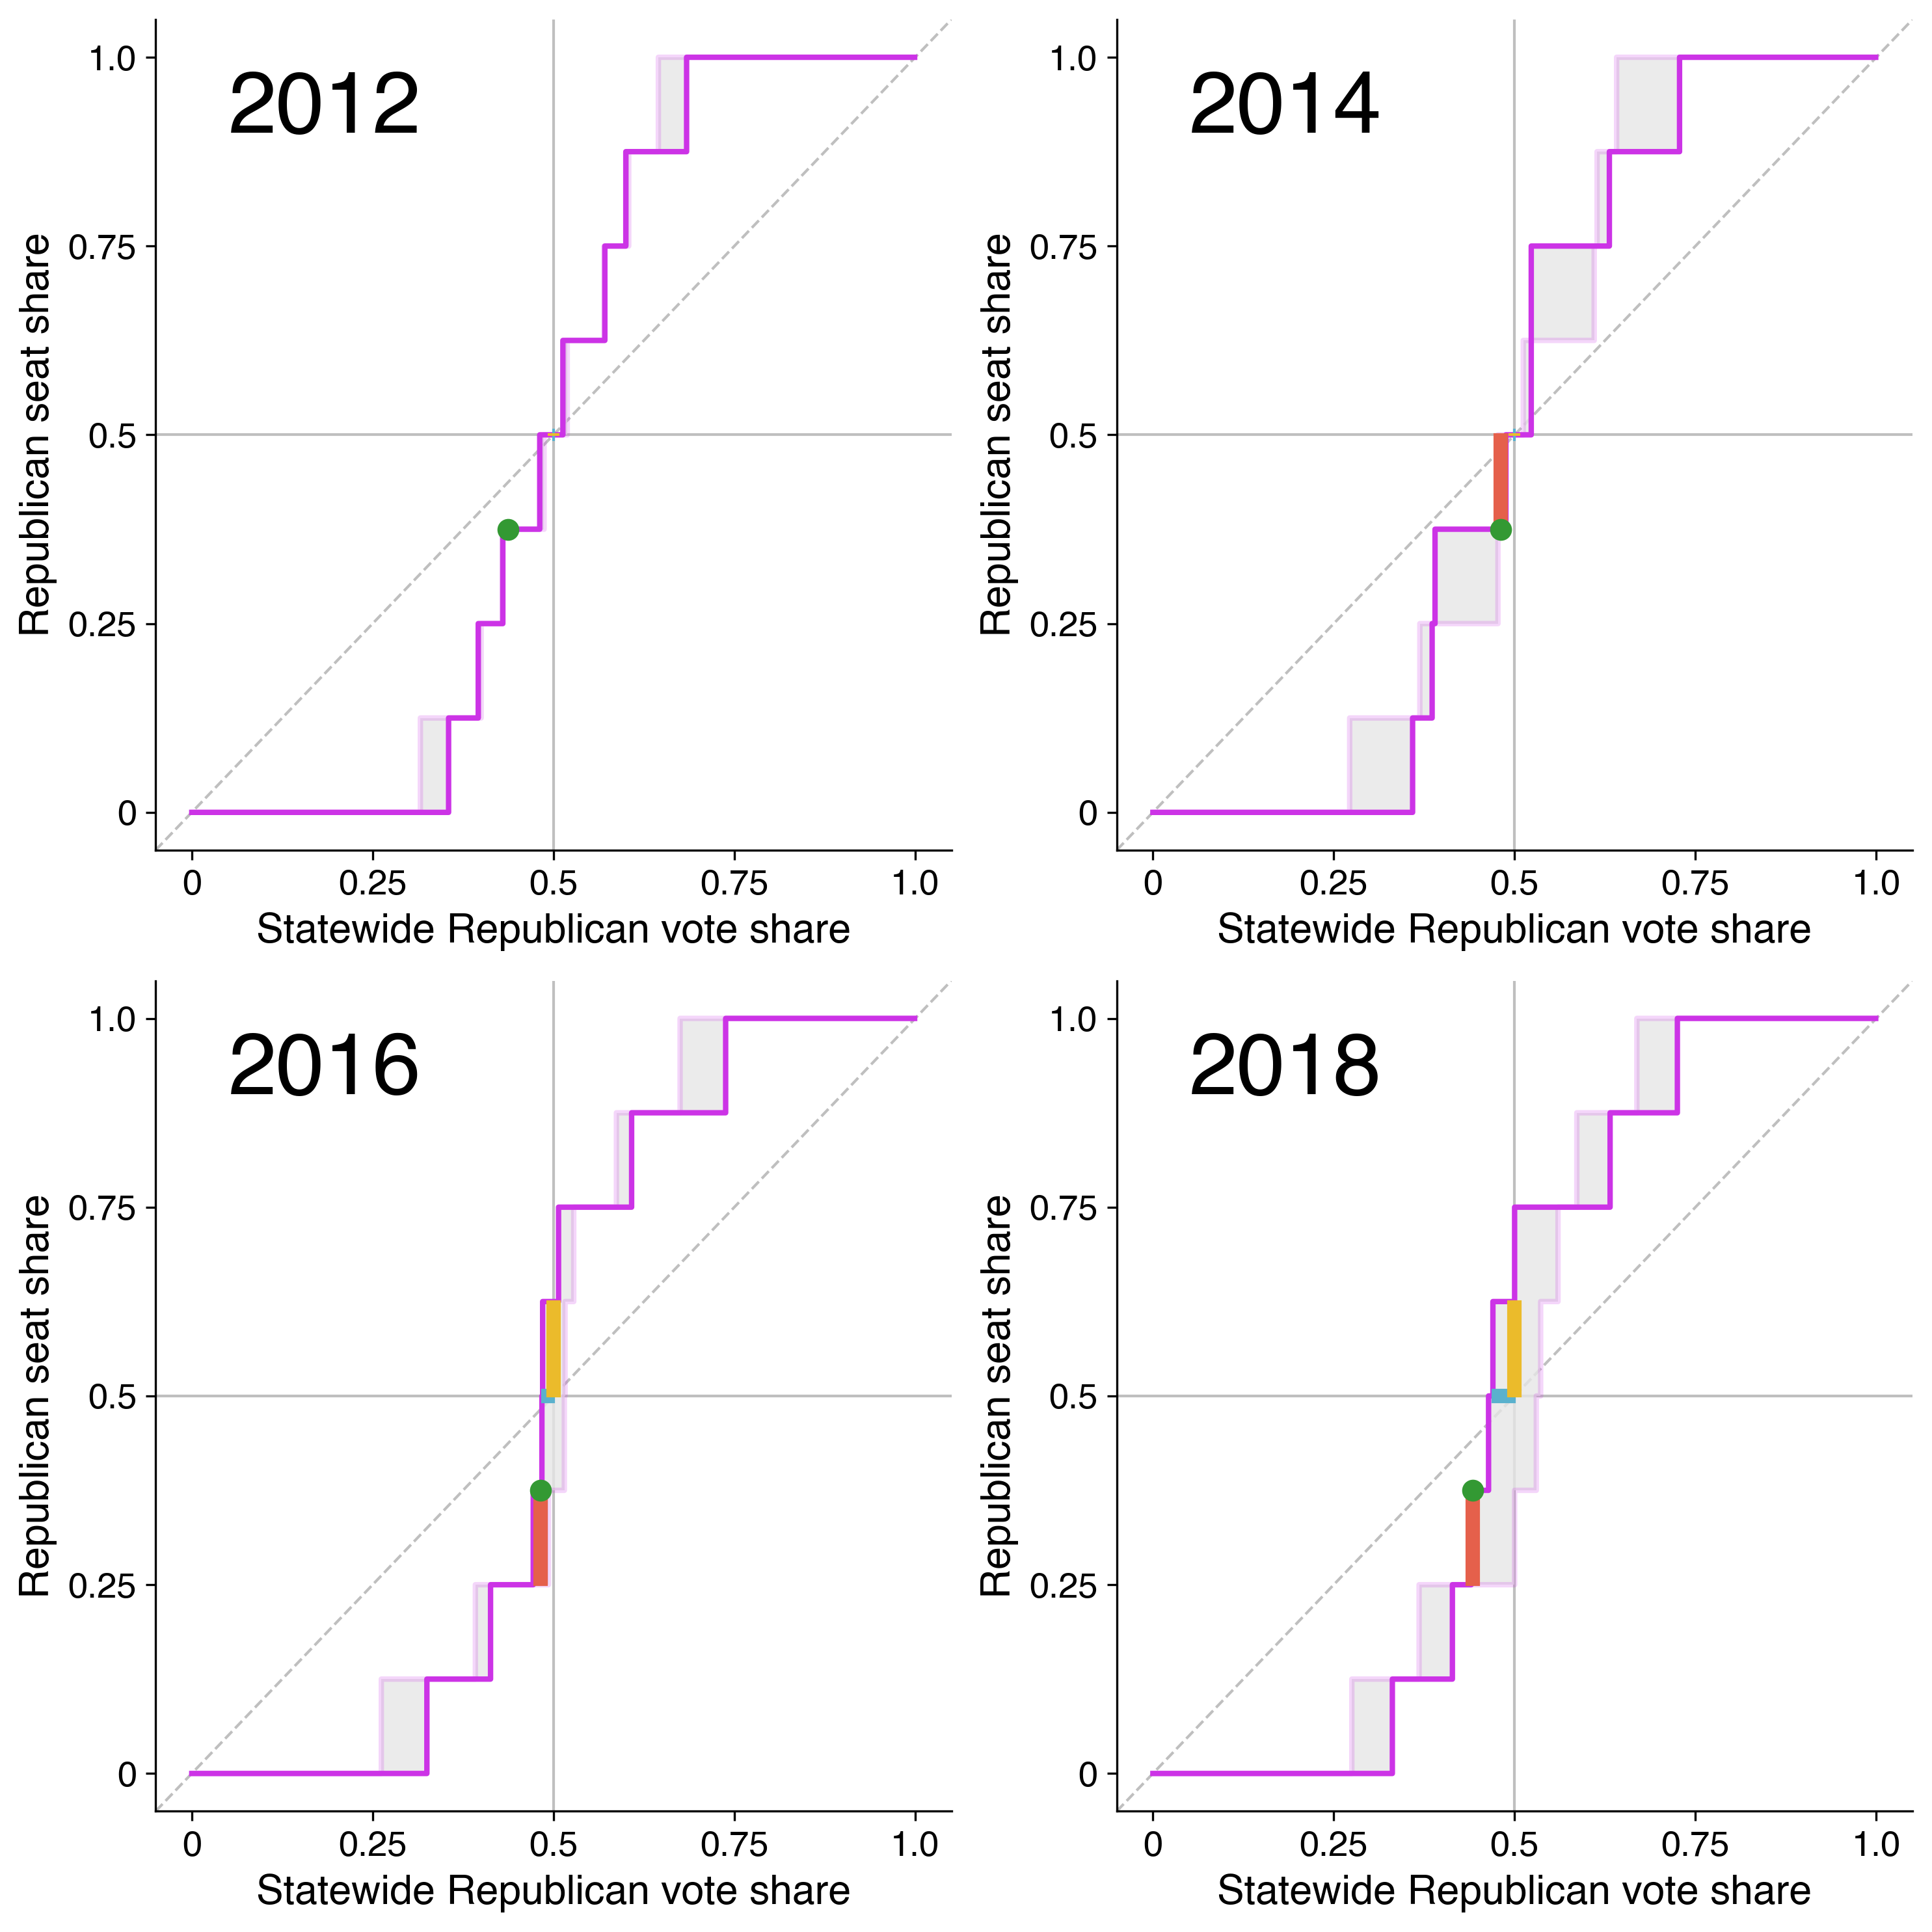

In [25]:
# Plot year by year election results in MN, showing partisan symmetry measures

state = "MN"
years = ["2012", "2014", "2016", "2018"]
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []
district_vote_shares = []

for year in years:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, int(year))
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    average_district_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(rep_votes_by_district, dem_votes_by_district)   

    if want_statewide_vote_share:
        actual_vote_share_list.append(republican_statewide_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear_using_statewide_vote_share(rep_votes_by_district, dem_votes_by_district)
    else:
        actual_vote_share_list.append(average_district_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)
    vote_list.append(ups_votes)
    seat_list.append(ups_seats)
    district_vote_shares.append(rep_vote_shares_by_district)




plot_all_measures_grid(years,
                       actual_vote_share_list, 
                       actual_seat_share_list, 
                       vote_list, 
                       seat_list,
                       x_label=x_label)
plt.tight_layout()
plt.savefig("outputs/stability.png", dpi=500)

make_partisan_symmetry_table(years,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list,district_vote_shares, latex=True)

In [26]:
state = "MN"
year = 2016

rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)

make_wasted_votes_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

\begin{tabular}{r|rrrrrr} {\bf District} & {\bf Votes for R} & {\bf Votes for D} & {\bf Total votes} & {\bf Needed to win}& {\bf Wasted by R} & {\bf Wasted by D} \\ \hline
1 & 166,524 & 169,071 & 335,595 & 167,798 & 166,524 &  1,273 \\ 
2 & 173,970 & 167,315 & 341,285 & 170,643 & 3,327 &  167,315 \\ 
3 & 223,075 & 169,238 & 392,313 & 196,157 & 26,918 &  169,238 \\ 
4 & 121,033 & 203,299 & 324,332 & 162,166 & 121,033 &  41,133 \\ 
5 & 80,660 & 249,957 & 330,617 & 165,309 & 80,660 &  84,648 \\ 
6 & 235,385 & 123,010 & 358,395 & 179,198 & 56,187 &  123,010 \\ 
7 & 156,944 & 173,572 & 330,516 & 165,258 & 156,944 &  8,314 \\ 
8 & 177,088 & 179,097 & 356,185 & 178,093 & 177,088 &  1,004 \\ 
\hline
\textit{Total} & 1,334,679 & 1,434,559 & 2,769,238 & & 788,681 & 595,935
\end{tabular}

 Efficiency gap:  -0.0696


In [27]:
make_competitiveness_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

\begin{tabular}{c|c|c|c|c|c} 
 &  &   &   &   \multicolumn{2}{c}{\textbf{Margin of victory...}} \\
\textbf{District}   &  \textbf{Total votes}   &   \textbf{\% Republican} &  \textbf{Winner} & \bf{in \%}  &   \textbf{in votes}\\ 
 \hline
1 & 335,595 & 49.6\% & D & 0.8\% & 2,547 \\
2 & 341,285 & 51.0\% & R & 1.9\% & 6,655 \\
3 & 392,313 & 56.9\% & R & 13.7\% & 53,837 \\
4 & 324,332 & 37.3\% & D & 25.4\% & 82,266 \\
5 & 330,617 & 24.4\% & D & 51.2\% & 169,297 \\
6 & 358,395 & 65.7\% & R & 31.4\% & 112,375 \\
7 & 330,516 & 47.5\% & D & 5.0\% & 16,628 \\
8 & 356,185 & 49.7\% & D & 0.6\% & 2,009 \\
\hline 
 Total & 2769238 & 48.197\% & 3R/5D &   &  \\
\end{tabular}


In [28]:
make_table_comparing_eg_expressions(['MD','MI','MN','MO','NC','NJ','OH','TN'],latex=True)

\begin{tabular}{c|rc} {\bf State} & {\bf EG} & $S-2V+\frac 12$\\ 
 \hline
MD & -0.11 &  -0.12 \\ 
MI & 0.15 &  0.13 \\ 
MN & -0.07 &  -0.09 \\ 
MO & 0.06 &  0.04 \\ 
NC & 0.19 &  0.2 \\ 
NJ & 0.06 &  -0.0 \\ 
OH & 0.11 &  0.09 \\ 
TN & -0.01 &  -0.02 \\ 
\end{tabular}


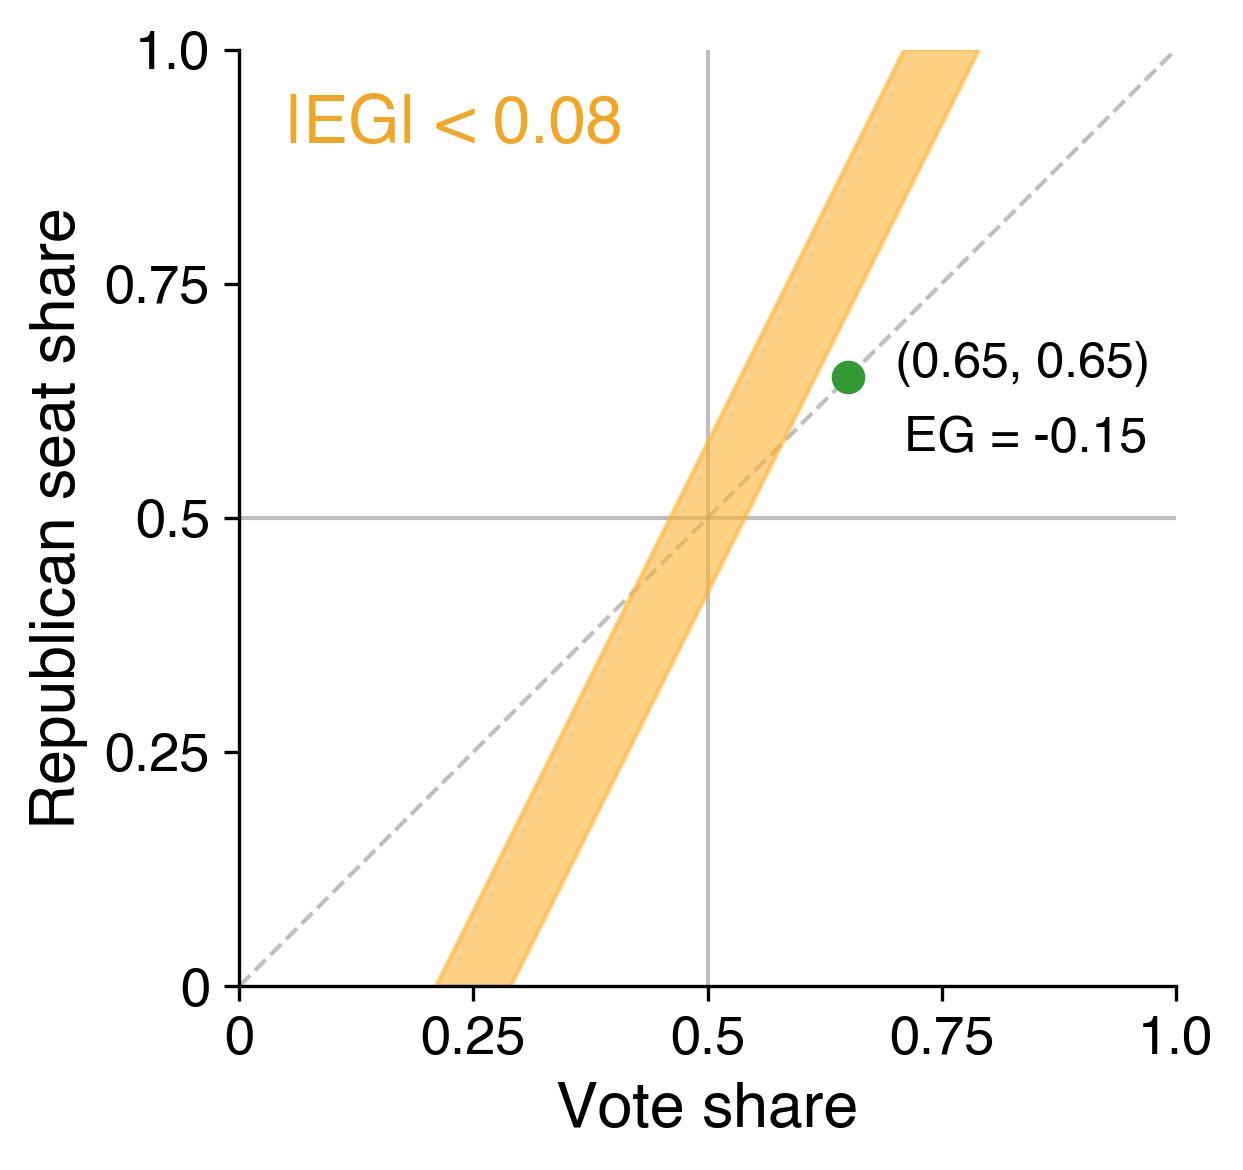

In [29]:
# Plot efficiency gap diagram

plot_eg_band()
plt.tight_layout()
plt.savefig("outputs/efficiency_gap.png", dpi=500)



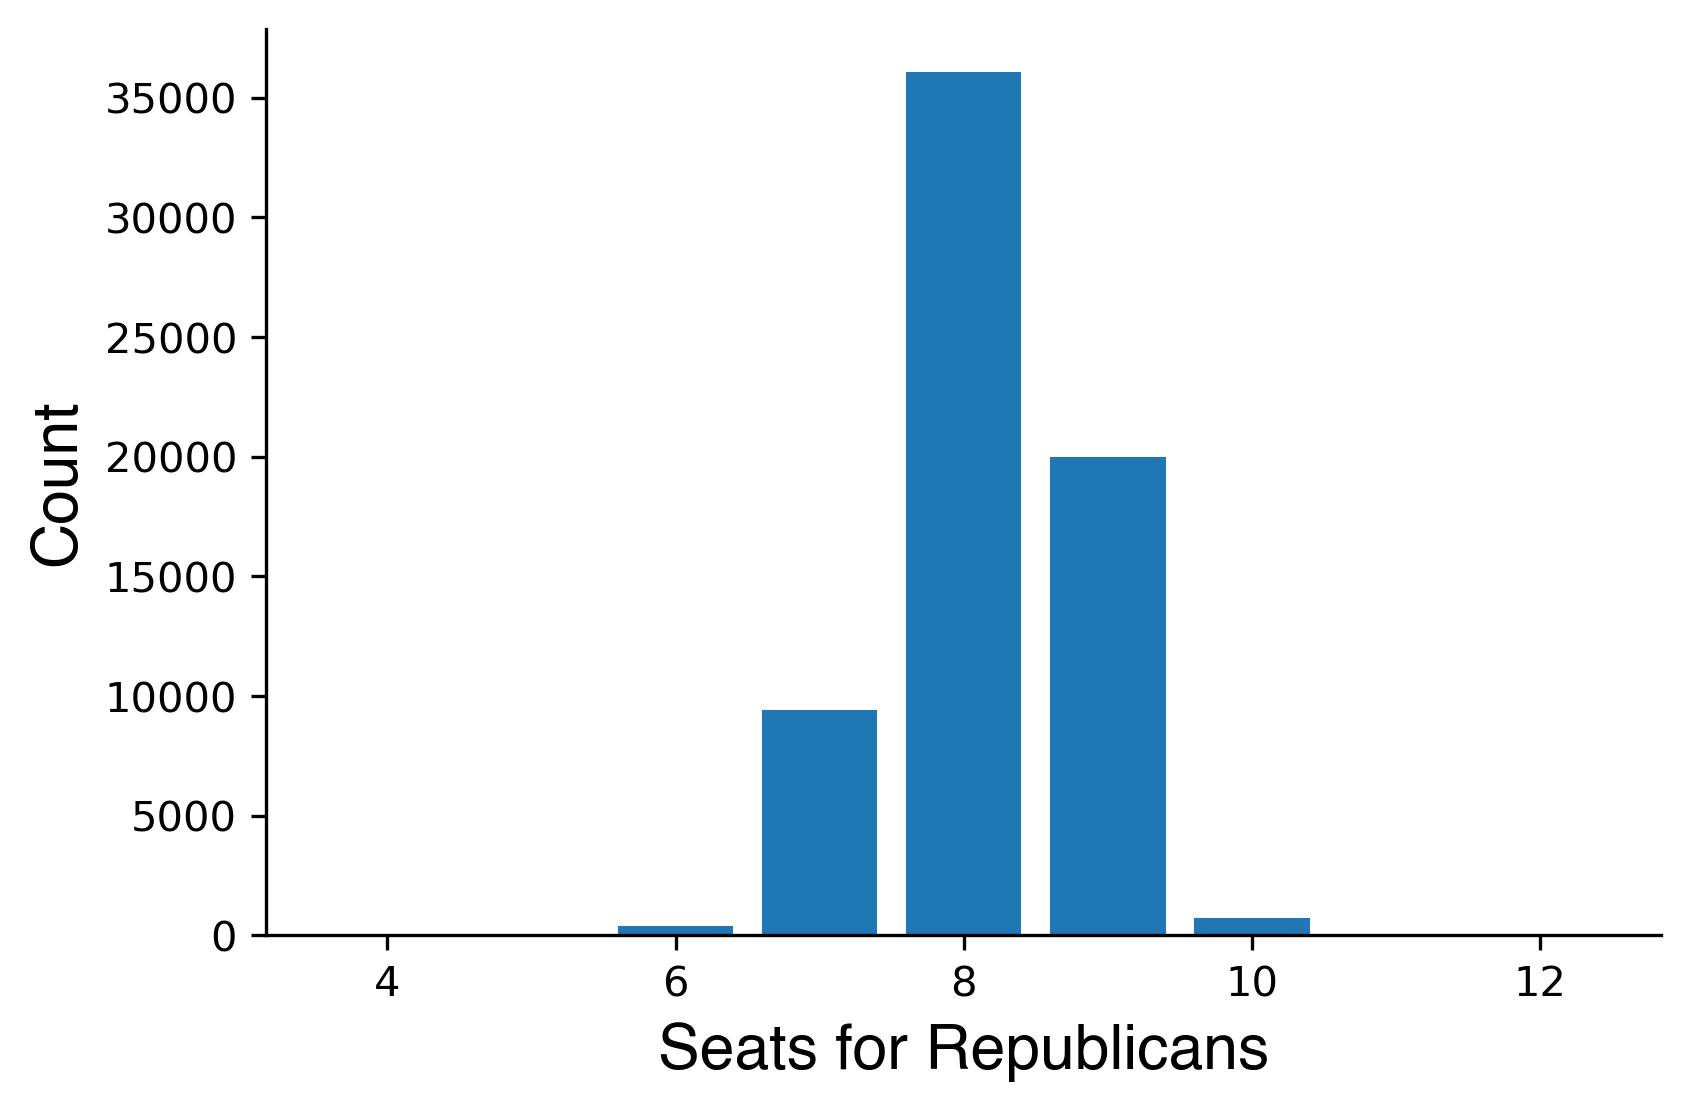

In [30]:
# Making a figure introducing the concept of ensembles; data from Duke group

north_carolina_plans = [0, 1, 370, 9429, 36055, 19973, 709, 7, 0]
north_carolina_seats = [4, 5, 6, 7, 8, 9, 10, 11, 12]
fig = plt.figure()
ax = fig.add_subplot(111)
font_name = 'Helvetica'
font_size = 15

plt.bar(north_carolina_seats,north_carolina_plans)

x_label = "Seats for Republicans"
y_label = "Count"
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel(x_label, fontname=font_name, fontsize=font_size)
ax.set_ylabel(y_label, fontname=font_name, fontsize=font_size)

plt.savefig("outputs/NC2016_Rseats_histogram.png")
